In [23]:
import os
import sys

project_root = os.getcwd()
while "src" not in os.listdir(project_root):
    project_root = os.path.dirname(project_root)
sys.path.append(project_root)

In [24]:
from src.pipelines.inference import load_SCUNET, inference_pipeline
import numpy as np
import librosa
import matplotlib.pyplot as plt
import torch

# pltconfig
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["image.cmap"] = "viridis"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%matplotlib inline

In [25]:
experiments_path = os.path.join(project_root, "experiments")
checkpoint_path = os.path.join(experiments_path, "checkpoints")
scunet_path = os.path.join(checkpoint_path, "scunet.pth")
results_path = os.path.join(experiments_path, "results", "scunet")

musdb_path = os.path.join(project_root, "data", "musdb18hq", "train")
musdb_files = os.listdir(musdb_path)
musdb_files.sort()

scunet = load_SCUNET(scunet_path, device)

In [ ]:
seconds = 30
N_FFT = 4096
HOP_LENGTH = 1024

random_sample = np.random.choice(musdb_files)
sample_path = os.path.join(musdb_path, random_sample)

In [ ]:
mixture_path = os.path.join(sample_path, "mixture.wav")
vocals_path = os.path.join(sample_path, "vocals.wav")
bass_path = os.path.join(sample_path, "bass.wav")
drums_path = os.path.join(sample_path, "drums.wav")
other_path = os.path.join(sample_path, "other.wav")

mixture, sr = librosa.load(mixture_path, sr=None)
vocals, _ = librosa.load(vocals_path, sr=None)
bass, _ = librosa.load(bass_path, sr=None)
drums, _ = librosa.load(drums_path, sr=None)
other, _ = librosa.load(other_path, sr=None)

mixture = mixture[: int(seconds * sr)]
vocals = vocals[: int(seconds * sr)]
bass = bass[: int(seconds * sr)]
drums = drums[: int(seconds * sr)]
other = other[: int(seconds * sr)]

mixture_stft = librosa.stft(mixture, n_fft=N_FFT, hop_length=HOP_LENGTH)
vocals_stft = librosa.stft(vocals, n_fft=N_FFT, hop_length=HOP_LENGTH)
bass_stft = librosa.stft(bass, n_fft=N_FFT, hop_length=HOP_LENGTH)
drums_stft = librosa.stft(drums, n_fft=N_FFT, hop_length=HOP_LENGTH)
other_stft = librosa.stft(other, n_fft=N_FFT, hop_length=HOP_LENGTH)

In [29]:
inference_pipeline(
    device=device,
    model=scunet,
    mixture_path=mixture_path,
    output_path=results_path,
)

Processing chunks: 100%|██████████| 139/139 [00:03<00:00, 39.40it/s]


Saved vocals to /home/nhrot/Programming/Python/DeepLearning/DeepSampler/experiments/results/scunet/vocals.wav
Saved drums to /home/nhrot/Programming/Python/DeepLearning/DeepSampler/experiments/results/scunet/drums.wav
Saved bass to /home/nhrot/Programming/Python/DeepLearning/DeepSampler/experiments/results/scunet/bass.wav
Saved other to /home/nhrot/Programming/Python/DeepLearning/DeepSampler/experiments/results/scunet/other.wav


{'vocals': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'drums': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'bass': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'other': array([-0.00024043, -0.00024124, -0.00024045, ...,  0.00525548,
         0.00521636,  0.00516349], dtype=float32)}

In [ ]:
res_vocals_path = os.path.join(results_path, "vocals.wav")
res_bass_path = os.path.join(results_path, "bass.wav")
res_drums_path = os.path.join(results_path, "drums.wav")
res_other_path = os.path.join(results_path, "other.wav")

res_vocals, sr = librosa.load(res_vocals_path, sr=None)
res_bass, _ = librosa.load(res_bass_path, sr=None)
res_drums, _ = librosa.load(res_drums_path, sr=None)
res_other, _ = librosa.load(res_other_path, sr=None)

res_vocals = res_vocals[: int(seconds * sr)]
res_bass = res_bass[: int(seconds * sr)]
res_drums = res_drums[: int(seconds * sr)]
res_other = res_other[: int(seconds * sr)]

res_vocals_stft = librosa.stft(res_vocals, n_fft=N_FFT, hop_length=HOP_LENGTH)
res_bass_stft = librosa.stft(res_bass, n_fft=N_FFT, hop_length=HOP_LENGTH)
res_drums_stft = librosa.stft(res_drums, n_fft=N_FFT, hop_length=HOP_LENGTH)
res_other_stft = librosa.stft(res_other, n_fft=N_FFT, hop_length=HOP_LENGTH)

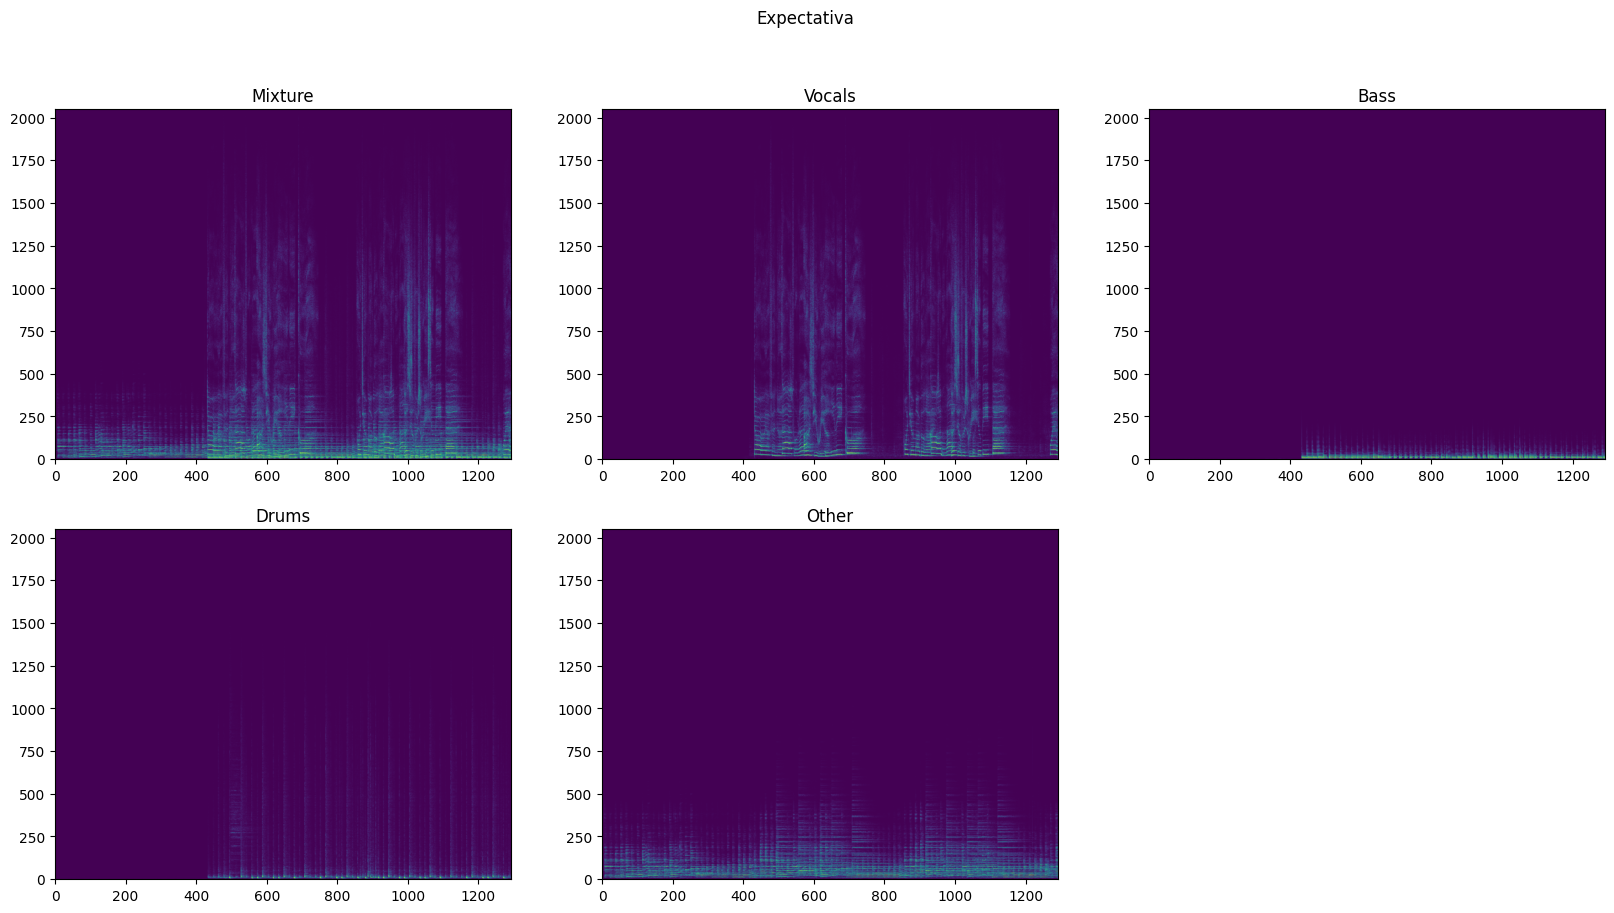

In [ ]:
plt.figure(figsize=(20, 10))
plt.suptitle("Expectativa")
plt.subplot(2, 3, 1)
plt.title("Mixture")
plt.imshow(np.log1p(np.abs(mixture_stft)), aspect="auto", origin="lower")
plt.subplot(2, 3, 2)
plt.title("Vocals")
plt.imshow(np.log1p(np.abs(vocals_stft)), aspect="auto", origin="lower")
plt.subplot(2, 3, 3)
plt.title("Bass")
plt.imshow(np.log1p(np.abs(bass_stft)), aspect="auto", origin="lower")
plt.subplot(2, 3, 4)
plt.title("Drums")
plt.imshow(np.log1p(np.abs(drums_stft)), aspect="auto", origin="lower")
plt.subplot(2, 3, 5)
plt.title("Other")
plt.imshow(np.log1p(np.abs(other_stft)), aspect="auto", origin="lower")

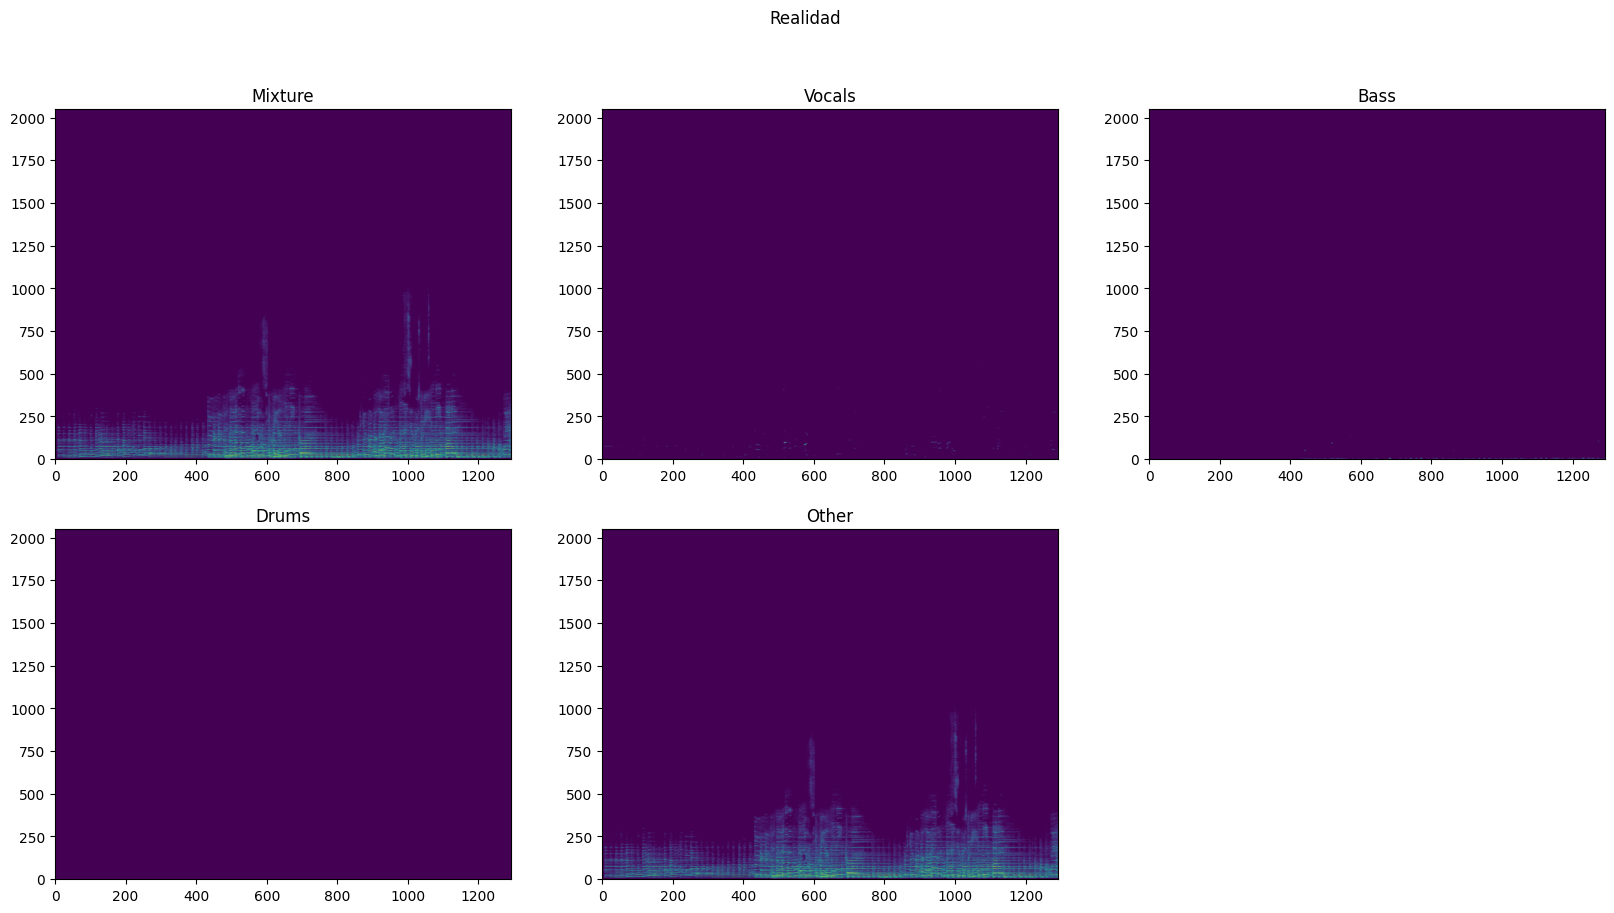

In [33]:
plt.figure(figsize=(20, 10))
plt.suptitle("Realidad")
plt.subplot(2, 3, 1)
plt.title("Mixture")
plt.imshow(
    np.log1p(np.abs(res_bass_stft + res_drums_stft + res_other_stft + res_vocals_stft)),
    aspect="auto",
    origin="lower",
)
plt.subplot(2, 3, 2)
plt.title("Vocals")
plt.imshow(np.log1p(np.abs(res_vocals_stft)), aspect="auto", origin="lower")
plt.subplot(2, 3, 3)
plt.title("Bass")
plt.imshow(np.log1p(np.abs(res_bass_stft)), aspect="auto", origin="lower")
plt.subplot(2, 3, 4)
plt.title("Drums")
plt.imshow(np.log1p(np.abs(res_drums_stft)), aspect="auto", origin="lower")
plt.subplot(2, 3, 5)
plt.title("Other")
plt.imshow(np.log1p(np.abs(res_other_stft)), aspect="auto", origin="lower")